In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("SMSSpamCollection" , sep ="\t" , names= ["labels","messages"])
df

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
x = df["messages"]
y = df["labels"]

In [4]:
vectorized = TfidfVectorizer(stop_words="english")
x_vectorized = vectorized.fit_transform(x)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x_vectorized,y,test_size=0.2,random_state=41)

In [6]:
model = RandomForestClassifier(n_estimators=100 , random_state= 30)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
x_pred = model.predict(x_test)
x_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'],
      shape=(1115,), dtype=object)

In [8]:
accuracy = accuracy_score(y_test,x_pred)
accuracy

0.9757847533632287

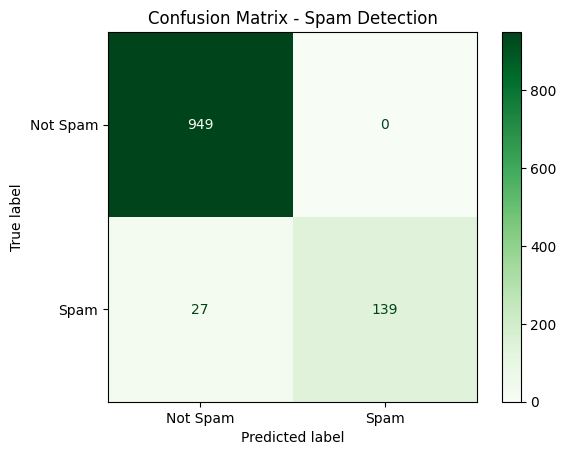

In [9]:
display = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test,x_pred) , display_labels=["Not Spam","Spam"])
display.plot(cmap = 'Greens' )
plt.title("Confusion Matrix - Spam Detection")
plt.show()

In [10]:
new_messages = ["Even my brother is not like to speak with me. They treat me like aids patent."]

new_vectorized = vectorized.transform(new_messages)
prediction = model.predict(new_vectorized)

for msg,pred in zip(new_messages,prediction):
    label = "Spam" if pred == 1 else "Not Spam"
    print(f"\n Messages: {msg}\n Prediction: {label}")


 Messages: Even my brother is not like to speak with me. They treat me like aids patent.
 Prediction: Not Spam
